In [122]:
"""
source data from : https://www.kaggle.com/regivm/retailtransactiondata
"""

'\nsource data from : https://www.kaggle.com/regivm/retailtransactiondata\n'

In [123]:
import pandas as pd

In [124]:
# read source data file
transactions = pd.read_csv(r"C:\Users\adepup\Documents\Prav-Development\Research\github\customer_loyalty\data\Retail_Data_Transactions.csv")

In [125]:
transactions['trans_date'] = pd.to_datetime(transactions['trans_date'])
transactions = transactions.sort_values(by='trans_date')
transactions.head(10)

,customer_id,trans_date,tran_amount
56171,CS3366,2011-05-16,77
77394,CS4165,2011-05-16,97
2548,CS1849,2011-05-16,79
57968,CS4432,2011-05-16,41
80045,CS5573,2011-05-16,93
61270,CS3983,2011-05-16,87
28695,CS2363,2011-05-16,42
19024,CS6034,2011-05-16,87
75646,CS3692,2011-05-16,63
101016,CS7445,2011-05-16,59


In [126]:
print(transactions["trans_date"].min())
print(transactions["trans_date"].max())

2011-05-16 00:00:00
2015-03-16 00:00:00


In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [128]:
"""
Check count of customers by date
"""

'\nCheck count of customers by date\n'

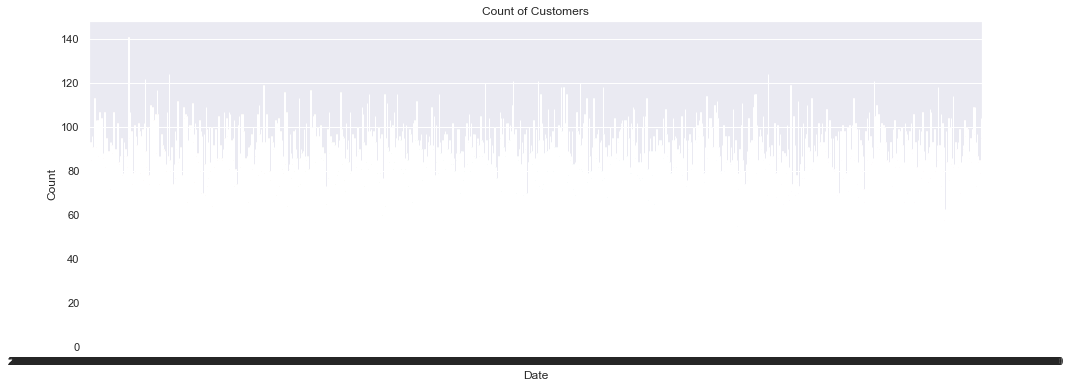

In [129]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="trans_date", data=transactions).set(title = 'Count of Customers', xlabel = 'Date', ylabel = 'Count' )

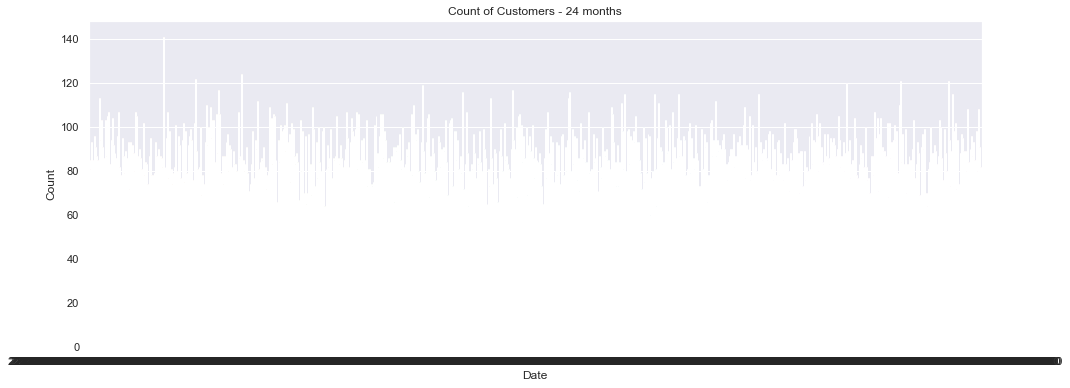

In [130]:
plt.figure(figsize=(16, 6))
# Assumption : limit analysis to 2 years, full dataset viz is not clear
ax = sns.countplot(x="trans_date", data=transactions[transactions["trans_date"]<="2013-05-16"]).set(title = 'Count of Customers - 24 months', xlabel = 'Date', ylabel = 'Count' )

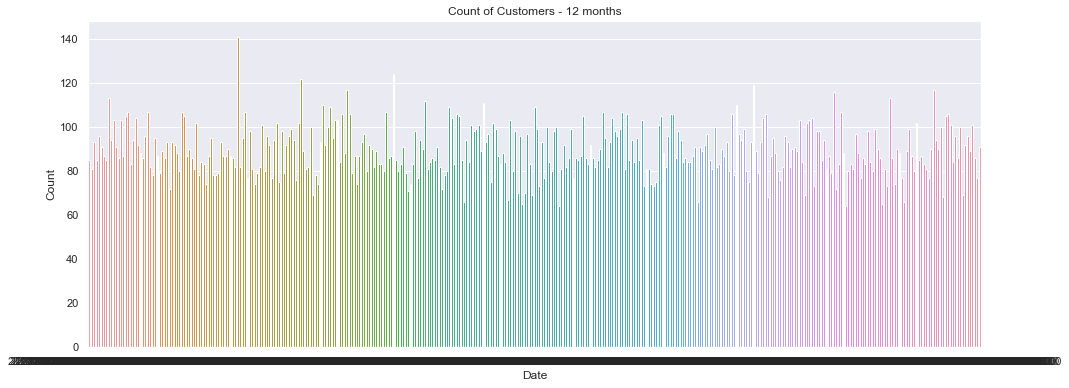

In [131]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="trans_date", data=transactions[transactions["trans_date"]<="2012-05-16"]).set(title = 'Count of Customers - 12 months', xlabel = 'Date', ylabel = 'Count' )

In [132]:
"""
Assumption : lets do further analysis for 2 years data only for quick analysis
"""

'\nAssumption : lets do further analysis for 2 years data only for quick analysis\n'

In [133]:
transactions = transactions[transactions["trans_date"]<="2012-05-16"]

In [134]:
transactions_stats = transactions.groupby(
                           ['customer_id']
                        ).agg(
                            {
                                 'trans_date':"count",    # count of dates, frequncy
                                 'tran_amount': {"mean",sum}       # mean, sum of trans amount                               
                            }
                        ).reset_index()
transactions_stats.columns = ["_".join(x) for x in transactions_stats.columns.ravel()]

In [135]:
transactions_stats.head(10)

,customer_id_,trans_date_count,tran_amount_mean,tran_amount_sum
0,CS1112,4,67.000000,268
1,CS1113,4,82.500000,330
2,CS1114,6,79.833333,479
3,CS1115,8,73.625000,589
4,CS1116,6,70.000000,420
5,CS1117,6,68.166667,409
6,CS1118,3,62.333333,187
7,CS1119,2,67.500000,135
8,CS1120,8,79.875000,639
9,CS1121,9,68.000000,612


In [136]:
transactions_stats['TotalAmount'] = transactions_stats["tran_amount_sum"].sum()
transactions_stats = transactions_stats.sort_values(by=['tran_amount_sum'], ascending=False)
transactions_stats['TotalAmount_cumulative'] = transactions_stats['tran_amount_sum'].cumsum()
transactions_stats['TotalMonetaryPercent'] = transactions_stats['TotalAmount_cumulative']/transactions_stats['TotalAmount']

In [137]:
bins = [0, 20, 40, 60,80,100]
labels = [20, 40, 60,80,100]
transactions_stats['TotalMonetary_bins'] = pd.cut(transactions_stats['TotalMonetaryPercent']*100, bins=bins, labels=labels)
transactions_stats[['TotalMonetary_bins']] = transactions_stats[['TotalMonetary_bins']].fillna(100)

del transactions_stats['TotalAmount']
del transactions_stats['TotalAmount_cumulative']

In [138]:
transactions_stats.head(10)

,customer_id_,trans_date_count,tran_amount_mean,tran_amount_sum,TotalMonetaryPercent,TotalMonetary_bins
1386,CS2508,14,74.714286,1046,0.000491,20
201,CS1313,14,74.000000,1036,0.000977,20
1498,CS2620,14,73.000000,1022,0.001456,20
3472,CS4608,13,78.538462,1021,0.001935,20
1749,CS2871,12,80.166667,962,0.002387,20
3943,CS5082,14,68.571429,960,0.002837,20
3970,CS5109,13,72.153846,938,0.003277,20
2280,CS3409,12,77.916667,935,0.003716,20
3381,CS4517,13,71.307692,927,0.004151,20
1950,CS3073,14,65.285714,914,0.004580,20


In [139]:
print(transactions_stats.groupby(
                           ['TotalMonetary_bins']
                        ).agg(
                            {
                                 'customer_id_':"count",            # count of customers
                                 'tran_amount_sum': {"mean"} ,      # mean of trans amount  
                                 'trans_date_count': {"mean"}       # mean of trans
                            }
                        ).reset_index())

print(transactions_stats.groupby(
                           ['TotalMonetary_bins']
                        ).agg(
                            {
                                 'customer_id_':"count",           # count of customers
                                 'tran_amount_sum': {"sum"} ,      # sum of trans amount  
                                 'trans_date_count': {"sum"}       # sum of trans
                            }
                        ).reset_index())


  TotalMonetary_bins customer_id_ tran_amount_sum trans_date_count
                     customer_id_            mean             mean
0                 20          642      663.099688         9.091900
1                 40          857      497.929988         6.994166
2                 60         1072      397.655784         5.744403
3                 80         1405      303.357295         4.730961
4                100         2814      151.494314         2.907249
  TotalMonetary_bins customer_id_ tran_amount_sum trans_date_count
                     customer_id_             sum              sum
0                 20          642          425710             5837
1                 40          857          426726             5994
2                 60         1072          426287             6158
3                 80         1405          426217             6647
4                100         2814          426305             8181


<Figure size 1152x432 with 0 Axes>

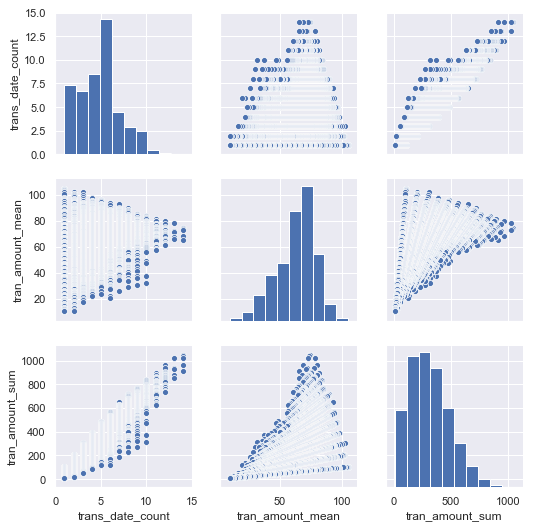

In [140]:
plt.figure(figsize=(16, 6))
sns.pairplot(transactions_stats[['trans_date_count','tran_amount_mean','tran_amount_sum']])

In [141]:
corr = transactions_stats[['trans_date_count','tran_amount_mean','tran_amount_sum']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,trans_date_count,tran_amount_mean,tran_amount_sum
trans_date_count,1,0.25,0.93
tran_amount_mean,0.25,1,0.54
tran_amount_sum,0.93,0.54,1
